In [20]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import functools
import nltk
import xgboost as xgb
import re


# Visualization
#!pip install plotly
import plotly.express as px

#!pip install emoji
from emoji import UNICODE_EMOJI

# Sklearn
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.svm import SVC, LinearSVC # for Support Vector Classification baseline model
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # for model evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics


contents = []
with open("rumour-annotation-2_annotations.json", 'rb') as j:
     contents.append(json.loads(j.read()))

contents2 = []
with open("rumour-annotation-3_annotations.json", 'rb') as j:
     contents2.append(json.loads(j.read()))

contents3 = []
with open("rumour-annotation_annotations.json", 'rb') as j:
     contents3.append(json.loads(j.read()))

contents4 = []
with open("rumour-annotation-4_annotations.json", 'rb') as j:
     contents4.append(json.loads(j.read()))

In [45]:
np.random.normal(0,1)

-0.42954930470293823

Text(0, 0.5, 'frequency')

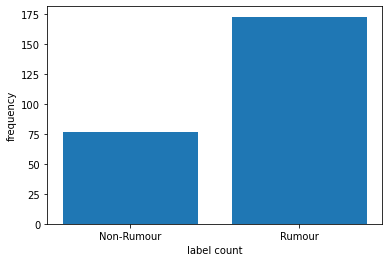

In [2]:
annotations = contents[0]["examples"]

classnames = []
for i in range(0,len(annotations)):
    classnames.append(annotations[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

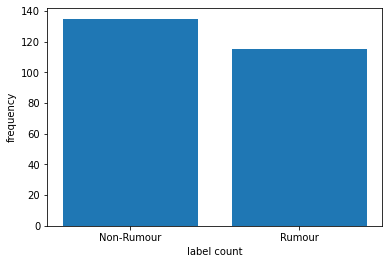

In [3]:
annotations2 = contents2[0]["examples"]

classnames2 = []
for i in range(0,len(annotations2)):
    classnames2.append(annotations2[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames2, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

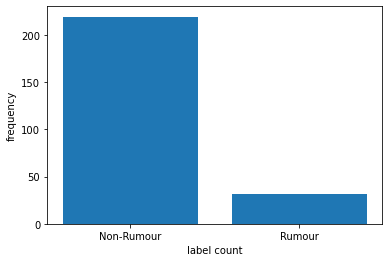

In [4]:
annotations3 = contents3[0]["examples"]

classnames3 = []
for i in range(0,len(annotations3)):
    classnames3.append(annotations3[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames3, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

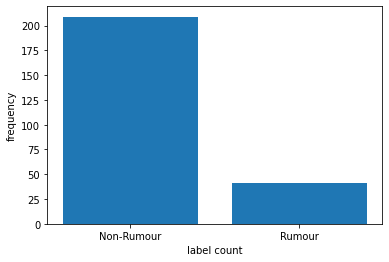

In [5]:
annotations4 = contents4[0]["examples"]

classnames4 = ["Rumour"]
for i in range(1,len(annotations4)):
    classnames4.append(annotations4[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames4, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

In [6]:
# Using readline()
file = open('#jinek.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data1 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#jinek")
        temp.append(-1)
        temp.append("n.a.")
        data1.append(temp)
len(data1)

175780

In [7]:
# Using readline()
file1 = open('#vleestaks.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data2 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#vleestaks")
        temp.append(-1)
        temp.append("n.a.")
        data2.append(temp)
len(data2)

10542

In [8]:
# Using readline()
file = open('#inflatie.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data3 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#inflatie")
        temp.append(-1)
        temp.append("n.a.")
        data3.append(temp)
len(data3)

39278

In [9]:
data = data1 + data2 + data3

In [10]:
sample1 = [annotations[i]["content"] for i in range(len(annotations))]
sample2 = [annotations2[i]["content"] for i in range(len(annotations2))]
sample3 = [annotations3[i]["content"] for i in range(len(annotations3))]
sample4 = [annotations4[i]["content"] for i in range(len(annotations4))]

sample = sample1 + sample2 + sample3 + sample4

annotations = annotations + annotations2 + annotations3 + annotations4

In [11]:
#adding rumours 

sample = [sample1, sample2, sample3, sample4]
annotators = ["A", "B", "C", "D"]
texts = [data[i][0]["text"] for i in range(len(data))]
for i in range(len(texts)):
    for s in sample:
        if texts[i] in s:
            if annotations[s.index(texts[i])]["classifications"] != []:
                label = annotations[s.index(texts[i])]["classifications"][0]["classname"]
                data[i][4] = annotators[sample.index(s)]
                if label == "Rumour":
                    data[i][3] = 1
                elif label == "Non-Rumour":
                    data[i][3] = 0
            else:
                data[i][3] = 1

In [12]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(norm = None, n_features = 10)
sentence_vectors = vectorizer.fit_transform(texts)
sentence_vectors = sentence_vectors.toarray()

In [13]:
sentence_vectors[100]

array([-1.,  0.,  2.,  0.,  0., -1.,  3.,  1., -2., -2.])

In [14]:
len(data)

225600

In [15]:
np.unique([data[i][4] for i in range(len(data))])

array(['A', 'B', 'C', 'D', 'n.a.'], dtype='<U4')

In [16]:
rumours = [x for x in data if x[3] == 1]
nonrumours = [x for x in data if x[3] == 0]
unlabelled = [x for x in data if x[3] == -1]

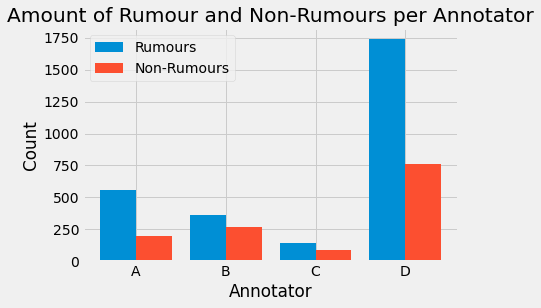

In [17]:
annotators = np.array(["A","B","C","D"])
_, rumour_counts = np.unique([x[4] for x in rumours], return_counts = True)
_, nonrumour_counts = np.unique([x[4] for x in nonrumours], return_counts = True)

X_axis = np.arange(len(annotators))

plt.style.use("fivethirtyeight")
plt.bar(X_axis - 0.2, rumour_counts, 0.4, label = 'Rumours')
plt.bar(X_axis + 0.2, nonrumour_counts, 0.4, label = 'Non-Rumours')

plt.xticks(X_axis, annotators)
plt.xlabel("Annotator")
plt.ylabel("Count")
plt.title("Amount of Rumour and Non-Rumours per Annotator")
plt.legend()
plt.show()

In [18]:
print(rumour_counts)

[ 556  359  145 1739]


In [19]:
print(nonrumour_counts)

[196 268  85 759]


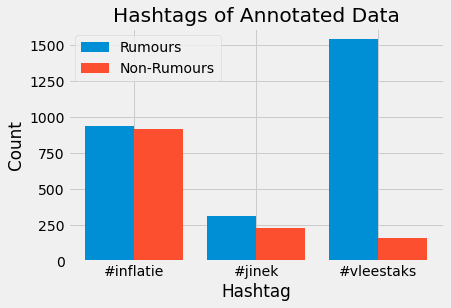

In [24]:
hashtags = np.array(["#inflatie", "#jinek", "#vleestaks"])
_, r_h_counts = np.unique([x[2] for x in rumours], return_counts = True)
_, nr_h_counts = np.unique([x[2] for x in nonrumours], return_counts = True)
#_, u_h_counts = np.unique([x[2] for x in unlabelled], return_counts = True)

X_axis = np.arange(len(hashtags))

plt.bar(X_axis - 0.2, r_h_counts, 0.4, label = 'Rumours')
plt.bar(X_axis + 0.2, nr_h_counts, 0.4, label = 'Non-Rumours')
#plt.bar(X_axis + 0.2, u_h_counts, 0.1, label = 'Unlabelled')

plt.xticks(X_axis, hashtags)
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.title("Hashtags of Annotated Data")
plt.legend()
plt.show()

In [25]:
r_h_unique, r_h_counts = np.unique([x[2] for x in rumours], return_counts = True)
print(r_h_unique)
print(r_h_counts)

['#inflatie' '#jinek' '#vleestaks']
[ 940  316 1543]


In [26]:
nr_h_unique, nr_h_counts = np.unique([x[2] for x in nonrumours], return_counts = True)
print(nr_h_unique)
print(nr_h_counts)

['#inflatie' '#jinek' '#vleestaks']
[917 230 161]


Text(0.5, 1.0, 'Total tweets per hashtag')

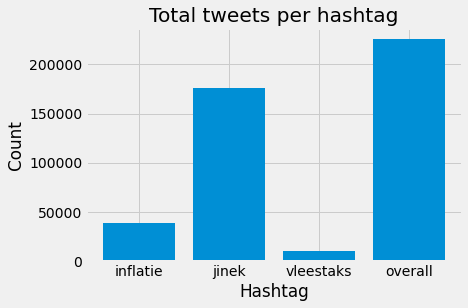

In [37]:
_, r_h_counts = np.unique([x[2] for x in rumours], return_counts = True)
_, nr_h_counts = np.unique([x[2] for x in nonrumours], return_counts = True)
_, u_h_counts = np.unique([x[2] for x in unlabelled], return_counts = True)

inflatie = sum([x[0] for x in [r_h_counts,nr_h_counts,u_h_counts]])
jinek = sum([x[1] for x in [r_h_counts,nr_h_counts,u_h_counts]])
vleestaks = sum([x[2] for x in [r_h_counts,nr_h_counts,u_h_counts]])
alll = sum([inflatie, jinek, vleestaks])

plt.bar(["inflatie", "jinek", "vleestaks", "overall"], [inflatie, jinek, vleestaks,alll])
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.title("Total tweets per hashtag")

In [11]:
import time 
#text = data2[x][0]["text"]

def get_features(data):

    features = []

    for x in range(0,len(data)):
        temp = []
        if data[x][1] != []:
            followers_count = data[x][1][0]["public_metrics"]["followers_count"]
            temp.append(followers_count)
        else:
            temp.append(0)

        tweetcount = -1 
        if data[x][1] != []:        
            tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
            temp.append(tweetcount)
        else:
            temp.append(0)

        qmarks = "?" in data[x][0]["text"]
        temp.append(int(qmarks))

        if data[x][1] != []:
            verified = data[x][1][0]["verified"]
            temp.append(int(verified))    
        else:
            temp.append(0)

        accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(accountlife)

        if data[x][1] != []:    
            ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
            temp.append(ratio)
        else:
            temp.append(0)

        emark = "!" in data[x][0]["text"]
        temp.append(int(emark))

        capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
        temp.append(capitalletters)

        retweet_count = data[x][0]["public_metrics"]["retweet_count"]
        temp.append(retweet_count)

        hashtags = "#" in data[x][0]["text"]
        temp.append(int(hashtags))

        if data[x][1] != []:
            following = data[x][1][0]["public_metrics"]["following_count"]
            temp.append(following)
        else:
            temp.append(0)

        text_length = len(data[x][0]["text"])
        temp.append(text_length)

        if data[x][1] != []:    
            listed_count = data[x][1][0]["public_metrics"]["listed_count"]
            temp.append(listed_count)
        else:
            temp.append(0)

        emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
        temp.append(int(emoticons))

        #reply_count = data[x][0]["public_metrics"]["reply_count"]
        #temp.append(reply_count)

        #quote_count = data[x][0]["public_metrics"]["quote_count"]
        #temp.append(quote_count)

        like_count = data[x][0]["public_metrics"]["like_count"]
        temp.append(like_count)

        if data[x][1] != []:
            timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
            temp.append(timeafterposting)
        else:
            temp.append(0)

        #pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
        #temp.append(pos_tags)

        activity = accountlife/tweetcount
        temp.append(activity)

        #if data[x][1] != []:
        #    has_url = "profile_image_url" in data[x][1][0]
        #    temp.append(int(has_url))
        #else:
        #    temp.append(None)

        #fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
        #temp.append(int(fpp))

        #nsfw = data[x][0]["possibly_sensitive"] 
        #temp.append(int(nsfw))
        #temp.append(data[x][2])
        #temp.append(sentence_vectors[x])
        #temp.append(texts[x])

        temp.append(data[x][3])
        features.append(temp)
        

    return features
        

In [12]:
features = get_features(data)

In [13]:
features1 = get_features(data1)
features2 = get_features(data2)
features3 = get_features(data3)

In [14]:
import pandas as pd

np.array(features, dtype=object).shape

columns = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
#          "reply_count",
#          "quote_count",
          "like_count",
          "time_after_posting",
#          "pos_tags",
          "activity",
#          "has_url",
#          "has_first_person_pronouns",
#          "possibly_sensitive",
#          "text",
          "label"]
df = pd.DataFrame(data=features, index=None, columns=columns)
#df = df.drop("hashtag", axis=1)
#del columns[-2]

In [15]:
df

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,label
0,12,2876,0,0,5874788.0,3.250000,0,0.583333,0,1,2,138,0,0,0,-42256836.0,2.042694e+03,-1
1,965,11545,0,0,5875327.0,3.864000,0,0.750000,1,1,248,134,18,0,0,-400289838.0,5.089066e+02,-1
2,41,9313,0,0,5876059.0,3.230769,0,4.583333,0,1,11,296,3,0,0,-166479246.0,6.309523e+02,-1
3,158,14946,0,0,5876074.0,9.937500,0,0.750000,1,1,14,140,30,0,0,-366653103.0,3.931536e+02,-1
4,158,14946,1,0,5876081.0,9.937500,0,1.333333,2,1,14,140,30,0,0,-366653096.0,3.931541e+02,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225595,0,0,1,0,393005259.0,0.000000,1,0.230769,0,1,0,124,0,0,0,0.0,-3.930053e+08,-1
225596,0,0,0,0,395268785.0,0.000000,1,0.545455,0,1,0,135,0,0,0,0.0,-3.952688e+08,-1
225597,0,0,0,0,398387361.0,0.000000,0,1.090909,0,1,0,136,0,0,0,0.0,-3.983874e+08,-1
225598,0,0,0,0,399339402.0,0.000000,1,0.363636,0,1,0,89,0,0,0,0.0,-3.993394e+08,-1


In [17]:
df[df['label']!=-1]

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,label


In [29]:
df.loc[0]["label"]

-1.0

In [30]:

for i in range(0,1):
#         df_train, df_test = train_test_split(df, test_size=0.25)
#         #print('Size of train dataframe: ', df_train.shape[0])
#         #print('Size of test dataframe: ', df_test.shape[0])

#         pd.options.mode.chained_assignment = None 
#         #df_train.loc[:,"label"] = labels
#         df_train = df_train.sort_index()
#         # Show target value distribution
#         #print('Target Value Distribution:')
#         #print(df_train['label'].value_counts())
#         #print(df_test['label'].value_counts())

#         ########## Step 1 - Data Prep ########## 
#         # Select only records with known labels
#         df_train_labeled=df_train[df_train['label']!=-1]

#         # Select data for modeling 
#         X_baseline=df_train_labeled[columns[:-1]]
#         y_baseline=df_train_labeled['label'].values

#         # Put test data into an array
#         X_test=df_test[columns[:-1]]
#         y_test=df_test['label'].values
        
#         print(y_test)
    df_labeled=df[df["label"]!=-1]
    df_train, df_test = train_test_split(df_labeled, test_size=0.2)

    df_unlabeled = df[df["label"]==-1]
    df_train = df_train.append(df_unlabeled)

    X_baseline=df_train[columns[:-1]]
    y_baseline=df_train['label'].values

    # Put test data into an array
    X_test=df_test[columns[:-1]]
    y_test=df_test['label'].values

    ########## Step 2 - Model Fitting ########## 
    # Specify SVC model parameters
    #model = GaussianNB()
    model = xgb.XGBClassifier(objective="binary:logistic")

    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_baseline, y_baseline)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test.values)))
    #AUC
    print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       275
           1       0.95      0.97      0.96       547

    accuracy                           0.95       822
   macro avg       0.95      0.94      0.94       822
weighted avg       0.95      0.95      0.95       822

0.9371979391723451


In [31]:
#"normal" model (no self training)

#df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df, test_size=0.2)

X_baseline=df_train[columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]]
y_test=df_test['label'].values

model = xgb.XGBClassifier(objective="binary:logistic")

model.fit(X_baseline, y_baseline)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     44322
           0       0.99      0.85      0.92       236
           1       1.00      0.88      0.94       562

    accuracy                           1.00     45120
   macro avg       1.00      0.91      0.95     45120
weighted avg       1.00      1.00      1.00     45120



In [32]:
#"normal" model without unlabeled data

df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

X_baseline=df_train[columns[:-1]]
y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]]
y_test=df_test['label'].values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = GaussianNB()
model = xgb.XGBClassifier(objective="binary:logistic")

model.fit(X_baseline, y_baseline)

print(classification_report(y_test, model.predict(X_test)))

print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       259
           1       0.97      0.97      0.97       563

    accuracy                           0.96       822
   macro avg       0.95      0.95      0.95       822
weighted avg       0.96      0.96      0.96       822

0.9750577778996963


In [33]:
#normal classification except use cross validation to train on all hashtags - 1  each iteration  
#just classifies everything as unlabelled  

df1 = pd.DataFrame(data=features1, index=None, columns=columns) #jinek
df2 = pd.DataFrame(data=features2, index=None, columns=columns) #vleestaks
df3 = pd.DataFrame(data=features3, index=None, columns=columns) #inflatie


from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=False)

dfs = [df1, df2, df3]

#model = xgb.XGBClassifier(objective="binary:logistic")



    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
    model = xgb.XGBClassifier(objective="binary:logistic")
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_train, y_train)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test.values)))
    print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))
    print("------")    

              precision    recall  f1-score   support

           0       0.27      0.27      0.27       230
           1       0.47      0.47      0.47       316

    accuracy                           0.38       546
   macro avg       0.37      0.37      0.37       546
weighted avg       0.38      0.38      0.38       546

0.36678591084204737
------
              precision    recall  f1-score   support

           0       0.00      0.02      0.01       161
           1       0.59      0.15      0.23      1543

    accuracy                           0.13      1704
   macro avg       0.30      0.09      0.12      1704
weighted avg       0.53      0.13      0.21      1704

0.08500823192699551
------
              precision    recall  f1-score   support

           0       0.04      0.02      0.02       917
           1       0.38      0.60      0.47       940

    accuracy                           0.31      1857
   macro avg       0.21      0.31      0.25      1857
weighted avg       0

In [34]:
#normal classification except use cross validation to train on all hashtags - 1  each iteration  
#just classifies everything as unlabelled  

df1 = pd.DataFrame(data=features1, index=None, columns=columns)
df2 = pd.DataFrame(data=features2, index=None, columns=columns)
df3 = pd.DataFrame(data=features3, index=None, columns=columns)


from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=False)

dfs = [df1, df2, df3]

model = xgb.XGBClassifier(objective="binary:logistic")

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
    #model = xgb.XGBClassifier(objective="binary:logistic")


    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    clf_ST = self_training_model.fit(X_train, y_train)



    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, clf_ST.predict(X_test.values)))
    print(roc_auc_score(y_test, clf_ST.predict(X_test.values)))
    print("------")    

              precision    recall  f1-score   support

           0       0.27      0.27      0.27       230
           1       0.47      0.47      0.47       316

    accuracy                           0.38       546
   macro avg       0.37      0.37      0.37       546
weighted avg       0.38      0.38      0.38       546

0.36678591084204737
------
              precision    recall  f1-score   support

           0       0.00      0.02      0.01       161
           1       0.59      0.15      0.23      1543

    accuracy                           0.13      1704
   macro avg       0.30      0.09      0.12      1704
weighted avg       0.53      0.13      0.21      1704

0.08500823192699551
------
              precision    recall  f1-score   support

           0       0.04      0.02      0.02       917
           1       0.38      0.60      0.47       940

    accuracy                           0.31      1857
   macro avg       0.21      0.31      0.25      1857
weighted avg       0

In [35]:
model = xgb.XGBClassifier(objective="binary:logistic")

model.fit(df[columns[:-1]], df['label'].values )

feature_importances = model.feature_importances_



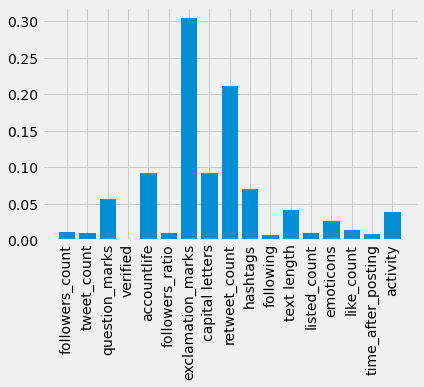

In [36]:
plt.bar(columns[:-1], feature_importances)
plt.xticks(ticks=range(len(feature_importances)), labels=columns[:-1], rotation=90)
plt.show()